In [1]:
import pandas as pd
import numpy as np
import random
import pickle
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
# Things to be improved
# 1. Check other machine learning algorithms
# 2. Implement the algorithms instead of simply importing


In [3]:
url = 'data_url.csv'
url_csv = pd.read_csv(url, sep=',', on_bad_lines='skip')
url_df = pd.DataFrame(url_csv)

url_df = np.array(url_df)
random.shuffle(url_df)

In [4]:
y = [d[1] for d in url_df]                 
urls = [d[0] for d in url_df]

In [5]:
def split_dataset(file_path, train_prob):

    df = pd.read_csv(file_path, header=None, names=["url", "label"])

    data = df["url"].values
    labels = df["label"].values
    
    if data.shape[0] != labels.shape[0]:
        raise ValueError("Data and Labels numbers don't match")
    
    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)

    #  if indices is [3, 0, 4, 1, 2] then - > data[3], data[0], data[4], data[1], data[2]
    shuffled_data = data[indices]
    shuffled_labels = labels[indices]

    train_count = int(train_prob * data.shape[0])

    d_train = shuffled_data[:train_count]
    d_test = shuffled_data[train_count:]
    l_train = shuffled_labels[:train_count]
    l_test = shuffled_labels[train_count:]

    return d_train, d_test, l_train, l_test

In [6]:
def sanitization(web):
    tokens = set(word for part in web.lower().split('/') for word in part.replace('-', '.').split('.'))
    tokens.discard('com')
    return list(tokens)

In [7]:
x_train_url, x_test_url, y_train, y_test = split_dataset(url, train_prob=0.8)

In [8]:
# term-frequency and inverse-document-frequency
vectorizer = TfidfVectorizer(tokenizer=sanitization)

x_train = vectorizer.fit_transform(x_train_url)
x_test = vectorizer.transform(x_test_url)

c:\Users\jimmy\anaconda3\envs\jimmy_coding\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [9]:
# Train the logistic regression model
lgr = LogisticRegression(solver='lbfgs', max_iter=1000)
lgr.fit(x_train, y_train)

# Evaluate the model
score = lgr.score(x_test, y_test)
print("Accuracy score: {:.2f}%".format(100 * score))


Accuracy score: 96.29%


In [10]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=1.0, max_iter=1000)  # Adjust max_iter as needed
svm.fit(x_train, y_train)

score = svm.score(x_test, y_test)
print("Accuracy score: {:.2f}%".format(100 * score))
vectorizer_save = vectorizer

c:\Users\jimmy\anaconda3\envs\jimmy_coding\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy score: 98.02%


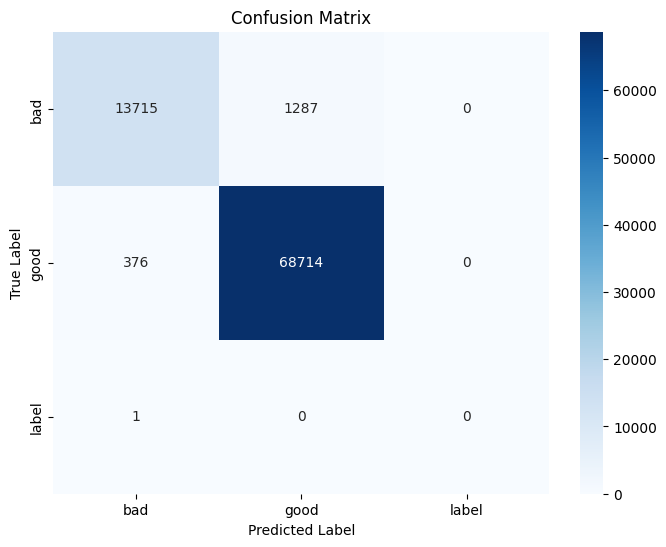

In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = svm.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [13]:
urls = []
website = input("Type the website you want to check ")
urls.append(website)
whitelist = ['hackthebox.eu','root-me.org','gmail.com', 'google.com']
s_url = [i for i in urls if i not in whitelist]
#Loading the model
file = "pickel_model.pkl"
with open(file, 'rb') as f1:  
    lgr = pickle.load(f1)
f1.close()
file = "pickel_vector.pkl"
with open(file, 'rb') as f2:  
    vectorizer = pickle.load(f2)
f2.close()

#predicting
x = vectorizer.transform(s_url)
y_predict = lgr.predict(x)

for site in whitelist:
    s_url.append(site)
#print(s_url)

predict = list(y_predict)
for j in range(0,len(whitelist)):
    predict.append('good')
print(f"\nThe entered domain \"{website}\" is: ", predict[0])


The entered domain "ulala.com" is:  good
